## Modificando o algoritmo kNN

In [1]:
import pandas as pd

link = 'C:/Users/Kanel/vEnv/trabalho-final/database/Financial-Data.csv'

df = pd.read_csv(link)
df

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17903,9949728,31,monthly,0,3245,0,5,3,2,6,...,700,71700,0.691126,0.928196,0.664112,0.838012,0.727705,0.627705,2,0
17904,9442442,46,bi-weekly,0,6525,0,2,1,3,3,...,800,51800,0.648525,0.970832,0.699241,0.844724,0.774918,0.474918,3,0
17905,9857590,46,weekly,0,2685,0,5,1,1,8,...,1200,59650,0.677975,0.918141,0.687981,0.939101,0.472045,0.672045,9,0
17906,8708471,42,bi-weekly,0,2515,0,3,5,6,1,...,400,80200,0.642741,0.885684,0.456448,0.686823,0.406568,0.406568,3,1


In [2]:
y = df['e_signed'] # coluna-alvo
x = df[[
    'risk_score', 'amount_requested', 'has_debt', 'income' 
]] # colunas com melhor correlação de Pearson

# x = df -> para usar todas as features

In [3]:
# dataset em 30% para testes
from sklearn.model_selection import train_test_split as tts

x_train, x_test, y_train, y_test = tts(x, y, test_size=0.3, random_state=2811)

print(f"Train Set: {x_train.shape}, \nTest Set: {x_test.shape}")

Train Set: (12535, 4), 
Test Set: (5373, 4)


In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
model = KNeighborsClassifier()

In [6]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [7]:
# resultados do R2 Score
from sklearn import metrics

print(f'Score treino: {model.score(x_train, y_train).round(4)}')
predicts = model.predict(x_test)
print(f'Accuracy: {metrics.accuracy_score(y_test, predicts).round(4)}')
print(f'F1-Score: {metrics.f1_score(y_test, predicts).round(4)}')
print(f'Recall: {metrics.recall_score(y_test, predicts).round(4)}')
print(f'Precision: {metrics.precision_score(y_test, predicts).round(4)}')
print(f'EQM: {metrics.mean_squared_error(y_test, predicts).round(4)}')

Score treino: 0.7199
Accuracy: 0.5552
F1-Score: 0.5968
Recall: 0.6153
Precision: 0.5794
EQM: 0.4448


Realizando modificações

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV

In [18]:
knn_params = {
    "n_neighbors": range(1, 30, 2),
    "weights": ["uniform","distance"],
    "metric": ["euclidean","manhattan","minkowski"],
    "leaf_size": range(1, 50, 5)
}

In [19]:
knn = KNeighborsClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
grid_search = GridSearchCV(estimator=knn, param_grid=knn_params, n_jobs=1, cv=cv, scoring="accuracy", error_score=0)
grid_results = grid_search.fit(x_train, y_train)

final_model = knn.set_params(**grid_results.best_params_)
final_model.fit(x_train, y_train)
y_pred = final_model.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(grid_results.best_params_)

              precision    recall  f1-score   support

           0       0.53      0.45      0.48      2498
           1       0.58      0.66      0.61      2875

    accuracy                           0.56      5373
   macro avg       0.55      0.55      0.55      5373
weighted avg       0.55      0.56      0.55      5373

[[1112 1386]
 [ 989 1886]]
{'leaf_size': 16, 'metric': 'manhattan', 'n_neighbors': 29, 'weights': 'distance'}


In [23]:
knn_params = {
    "n_neighbors": range(1, 30, 2),
    "weights": ["uniform","distance"],
    "metric": ["euclidean","manhattan","minkowski"],
    "algorithm": ["auto","ball_tree","kd_tree","brute"],
    "leaf_size": range(1, 50, 5)
}

In [24]:
knn = KNeighborsClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
grid_search = GridSearchCV(estimator=knn, param_grid=knn_params, n_jobs=1, cv=cv, scoring="accuracy", error_score=0)
grid_results = grid_search.fit(x_train, y_train)

final_model = knn.set_params(**grid_results.best_params_)
final_model.fit(x_train, y_train)
y_pred = final_model.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(grid_results.best_params_)

              precision    recall  f1-score   support

           0       0.53      0.45      0.48      2498
           1       0.58      0.66      0.61      2875

    accuracy                           0.56      5373
   macro avg       0.55      0.55      0.55      5373
weighted avg       0.55      0.56      0.55      5373

[[1112 1386]
 [ 989 1886]]
{'algorithm': 'auto', 'leaf_size': 16, 'metric': 'manhattan', 'n_neighbors': 29, 'weights': 'distance'}


In [26]:
import seaborn as sns

              precision    recall  f1-score   support

           0       0.53      0.45      0.48      2498
           1       0.58      0.66      0.61      2875

    accuracy                           0.56      5373
   macro avg       0.55      0.55      0.55      5373
weighted avg       0.55      0.56      0.55      5373



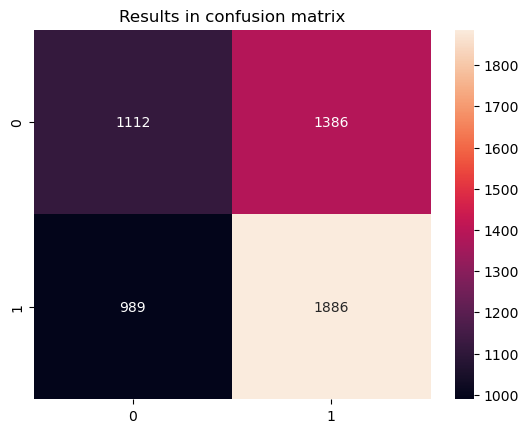

In [27]:
cofMat = confusion_matrix(y_test,y_pred)
sns.heatmap(cofMat, annot=True, fmt="d").set_title("Results in confusion matrix")

print(classification_report(y_test, y_pred))